# EDA and data preparation
*@XavierTorres*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.max_open_warning'] = 0
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv(r'Data_input/OUTPUT_WBI_cyclones_merged.csv', sep = ';')

In [3]:
df.columns

Index(['ID', 'NAME', 'ISO', 'Year', 'COORDS', 'BASIN', 'SUBBASIN', 'NATURE',
       'ISO_TIME', 'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS', 'USA_SSHS',
       'PRES_CALC_mean', 'STORM_SPD_mean', 'STORM_DR_mean', 'v_land_kn',
       '34kn_pop', '34kn_assets', '64kn_pop', '64kn_assets', '96kn_pop',
       '96kn_assets', 'Total damage ('000$)', 'CPI',
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km of land area)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Rural population (% of total population)', 'Income_level_Final',
       'Total Affected'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 39 columns):
ID                                                     1074 non-null int64
NAME                                                   1073 non-null object
ISO                                                    1074 non-null object
Year                                                   1074 non-null int64
COORDS                                                 1074 non-null object
BASIN                                                  1074 non-null object
SUBBASIN                                               1074 non-null object
NATURE                                                 1074 non-null object
ISO_TIME                                               1074 non-null object
TOTAL_HRS                                              1074 non-null int64
DAY_HRS                                                1074 non-null int64
NIGHT_HRS                                              1074 n

### Changes into data values (read documentation link)
https://docs.google.com/spreadsheets/d/1ff0m-Tl1QrNvR_zQ_WRleuRZevta-JBdXVVDsfLTwOQ/edit#gid=0

BASIN and SUBBASIN: 'MM' value means missing:

In [5]:
df["SUBBASIN"]= df["SUBBASIN"].replace('MM', np.nan) 
df["BASIN"]= df["BASIN"].replace('MM', np.nan) 

USA_SSHS column with value -5 = Unknown [XX]:

In [6]:
df["USA_SSHS"]= df["USA_SSHS"].replace(-5, np.nan) 

As damage in '000 USD is time-money sensitive, we can use the CPI for that data point to calculate "Total Damage Adjusted" 
by dividing Total Damage by the CPI. We then drop columns for Damage and CPI.
CPI meaning = https://en.wikipedia.org/wiki/Consumer_price_index

In [7]:
df["Total damage ('000$)_Adjusted"]= df["Total damage ('000$)"] / df["CPI"]
df["Total damage ('000$)_Adjusted"]= df["Total damage ('000$)_Adjusted"].replace(0, np.nan) 

In [8]:
df = df.drop(["Total damage ('000$)",'CPI'], axis=1)
df["Total damage ('000$)_Adjusted"].isna().sum()

335

Trying to create a calculated column that better represents de relative dimension of exposed population and assets. We have several columns for people and assets exposed depending of windspeed (v_land_kn) for 34kn+, 64kn+ and 96kn+. Let's add these columns to createa new column:

In [9]:

df['CALC_pop_exposed'] = df['34kn_pop'] + df['64kn_pop'] + df['96kn_pop']

Let's do the same for asset exposure

In [10]:

df['CALC_assets_exposed'] = df['34kn_assets'] + df['64kn_assets'] + df['96kn_assets']

In [11]:
df.sample(2)

,ID,NAME,ISO,Year,COORDS,BASIN,SUBBASIN,NATURE,ISO_TIME,TOTAL_HRS,...,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final,Total Affected,Total damage ('000$)_Adjusted,CALC_pop_exposed,CALC_assets_exposed
189,198,ZITA,CHN,1997,"[[20.9, 110.1], [22.08, 101.78]]",WP,WP,TS,"['1997-08-22 06:00:00', '1997-08-23 21:00:00']",15,...,70.428,1.048577,131.023100,2.035901,67.117,Low_Middle,5650349,5255.962574,46708504.0,1.070944e+12
991,1008,JANGMI,PHL,2014,"[[8.12, 127.2], [8.3, 126.87], [8.5, 126.58], ...",WP,NaN,TS,"['2014-12-28 12:00:00', '2014-12-28 15:00:00',...",15,...,70.481,110.757701,337.100104,1.840000,53.907,Low_Middle,578549,191.017222,11858021.0,1.150000e+11


In [12]:
df = df.drop(['34kn_pop', '34kn_assets', '64kn_pop', '64kn_assets', '96kn_pop','96kn_assets'], axis=1)

Let's arrange columns of dataframe:

In [13]:
df.columns

Index(['ID', 'NAME', 'ISO', 'Year', 'COORDS', 'BASIN', 'SUBBASIN', 'NATURE',
       'ISO_TIME', 'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS', 'USA_SSHS',
       'PRES_CALC_mean', 'STORM_SPD_mean', 'STORM_DR_mean', 'v_land_kn',
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km of land area)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Rural population (% of total population)', 'Income_level_Final',
       'Total Affected', 'Total damage ('000$)_Adjusted', 'CALC_pop_exposed',
       'CALC_assets_exposed'],
      dtype='object')

In [14]:
df = df[['ID', 'NAME', 'ISO', 'Year', 'ISO_TIME', 'COORDS', 'BASIN', 'SUBBASIN', 'NATURE',
        'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS', 'USA_SSHS',
       'PRES_CALC_mean', 'STORM_SPD_mean', 'STORM_DR_mean', 'v_land_kn', 'CALC_pop_exposed',
       'CALC_assets_exposed', "Total damage ('000$)_Adjusted",
         
    # here features from World Bank Indicators:
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km of land area)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Rural population (% of total population)', 'Income_level_Final',
         
    # Target label at the end  
       'Total Affected']]

### Checking Nulls

In [15]:
# Checking quantity of missing data. Reusing code from Fabi
def null_cols(data):

    """
    This function takes a dataframe df and shows the columns of df that have NaN values
    and the number of them

    """
    nulls = data.isna().sum()
    nulls = nulls[nulls > 0] / len(data) * 100
    nulls = pd.DataFrame(nulls.sort_values(ascending = False))
    nulls = nulls.reset_index().rename(columns = {"index": "Feature", 0: "% Null rows"})
    return nulls

In [16]:
null_cols(df)

,Feature,% Null rows
0,SUBBASIN,38.826816
1,Total damage ('000$)_Adjusted,31.191806
2,CALC_assets_exposed,23.556797
3,CALC_pop_exposed,23.556797
4,"Air transport, freight (million ton-km)",16.573557
5,GDP growth (annual %),4.096834
6,Mobile cellular subscriptions (per 100 people),1.024209
7,Adjusted savings: education expenditure (% of ...,0.931099
8,Cereal yield (kg per hectare),0.931099
9,GDP per capita (constant 2010 US$),0.837989


### Checking correlations

In [17]:
df['TOTAL_HRS'].corr(df['Total Affected'])

0.10277493191414867

In [18]:
numerical_features = list(df.select_dtypes(include=['float64', 'int64']).columns)

In [19]:
df_num = df[numerical_features]

In [20]:
#correlation matrices
corr_num = df_num.corr(method = "spearman")

(26.5, -0.5)

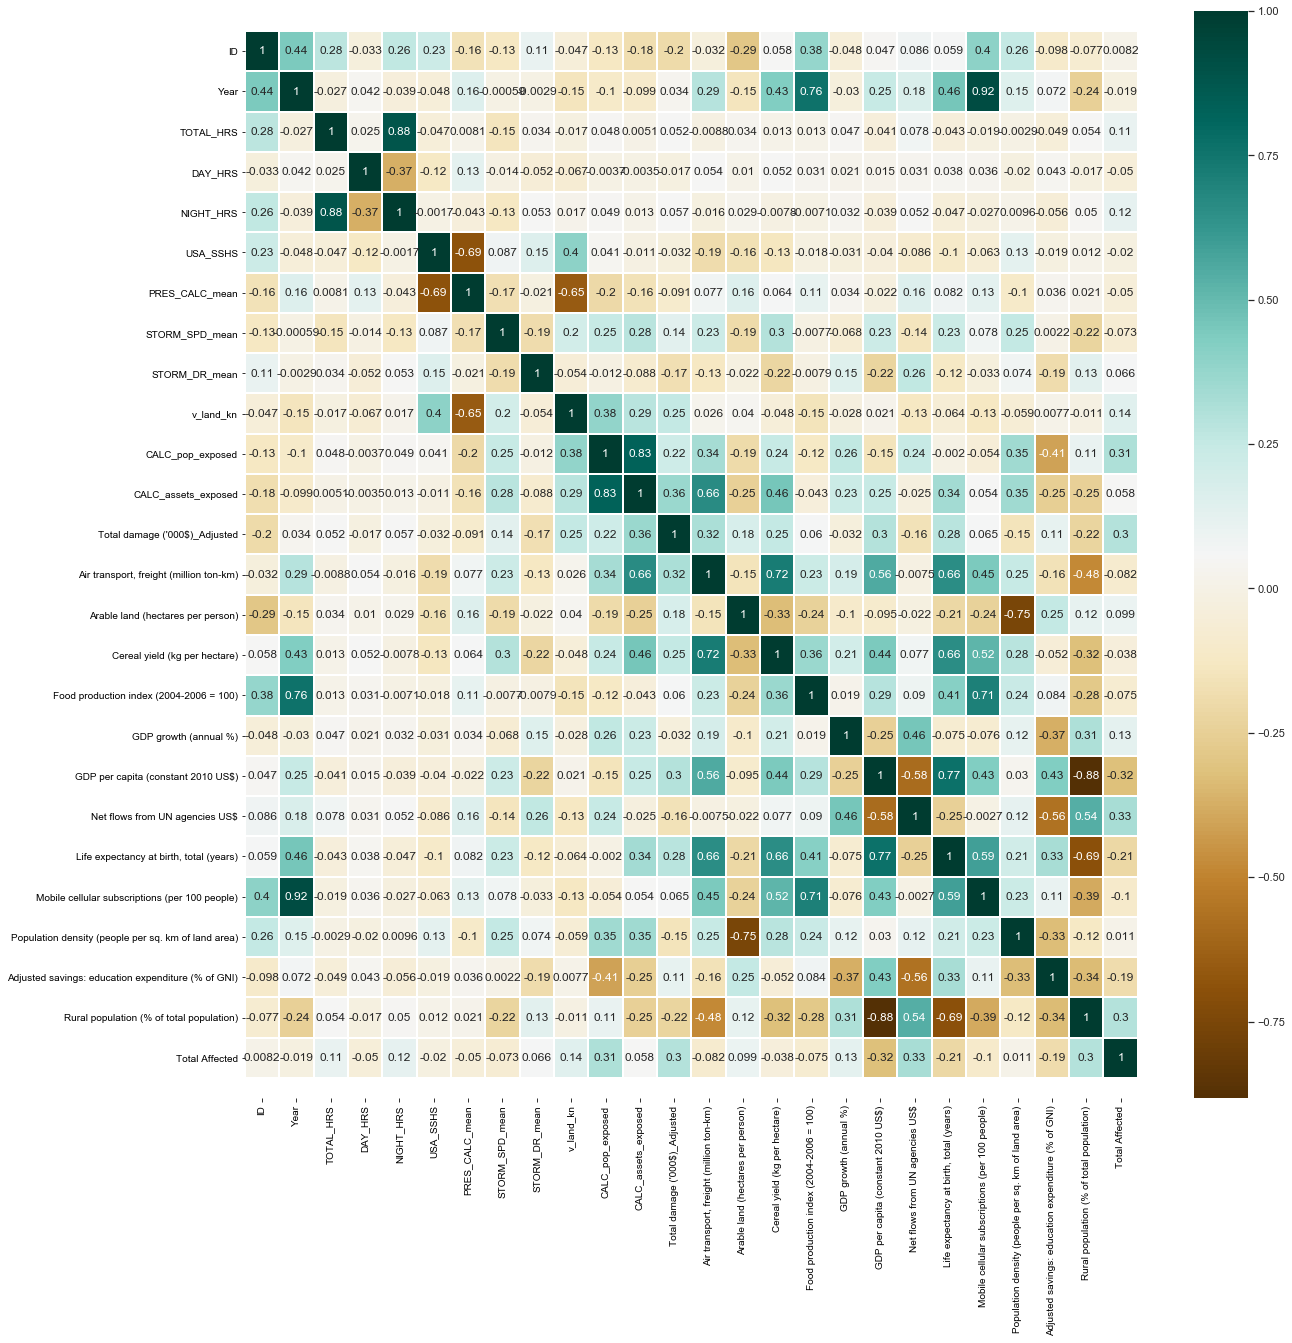

In [21]:
fig, ax = plt.subplots(figsize=(20,20))
ax = plt.subplot(111)
sns.set(font_scale=1)
sns.heatmap(corr_num, annot=True,  linewidth=1, cmap="BrBG", ax=ax)
bottom, top = ax.get_ylim()             # this fixes a bug where first and last columns were not visualized correctly
ax.set_ylim(bottom + 0.5, top - 0.5)

Up to this point, **Total Affected has no stong correlation with any numerical feature**. Anyways, the strongest ones are:

- **corr aprox +-0.3** = 'CALC_pop_Exp', 'Total Damage ('000$)_Adjusted', 'GDP per Capita', 'Net flows from UN', 'Rural Population'

Strong correlations between features are:

- -0.88 for "Rural Population" with "GDP per capita"  + -0.7 for "Rural Population" with "Life Expectancy at birth" ==> **Drop "Rural Population"**
- -0.76 for "Population Density" with "Arable land Ha/pp"  ==> **Drop "Population density"**, it has lower corr with target than Arable Land
- +0.83 for 'CALC_pop_Exp' with 'CALC_assets_Exp' ==> **Drop 'CALC_assets_Exposed'**
- +0.88  for 'NIGHT_HRS' with 'TOTAL_HRS" ==> **Drop 'NIGHT_HRS'**
- +0.71 for 'Mobile suscriptions' with 'Food Production Index' ==> **Drop 'Mobile suscriptions'** also because there is no mobile suscriptions before 1982

Let's see what we have after dropping these...

In [22]:
df = df.drop(['Rural population (% of total population)', 'Population density (people per sq. km of land area)', 'CALC_assets_exposed','NIGHT_HRS','Mobile cellular subscriptions (per 100 people)'], axis=1)

(21.5, -0.5)

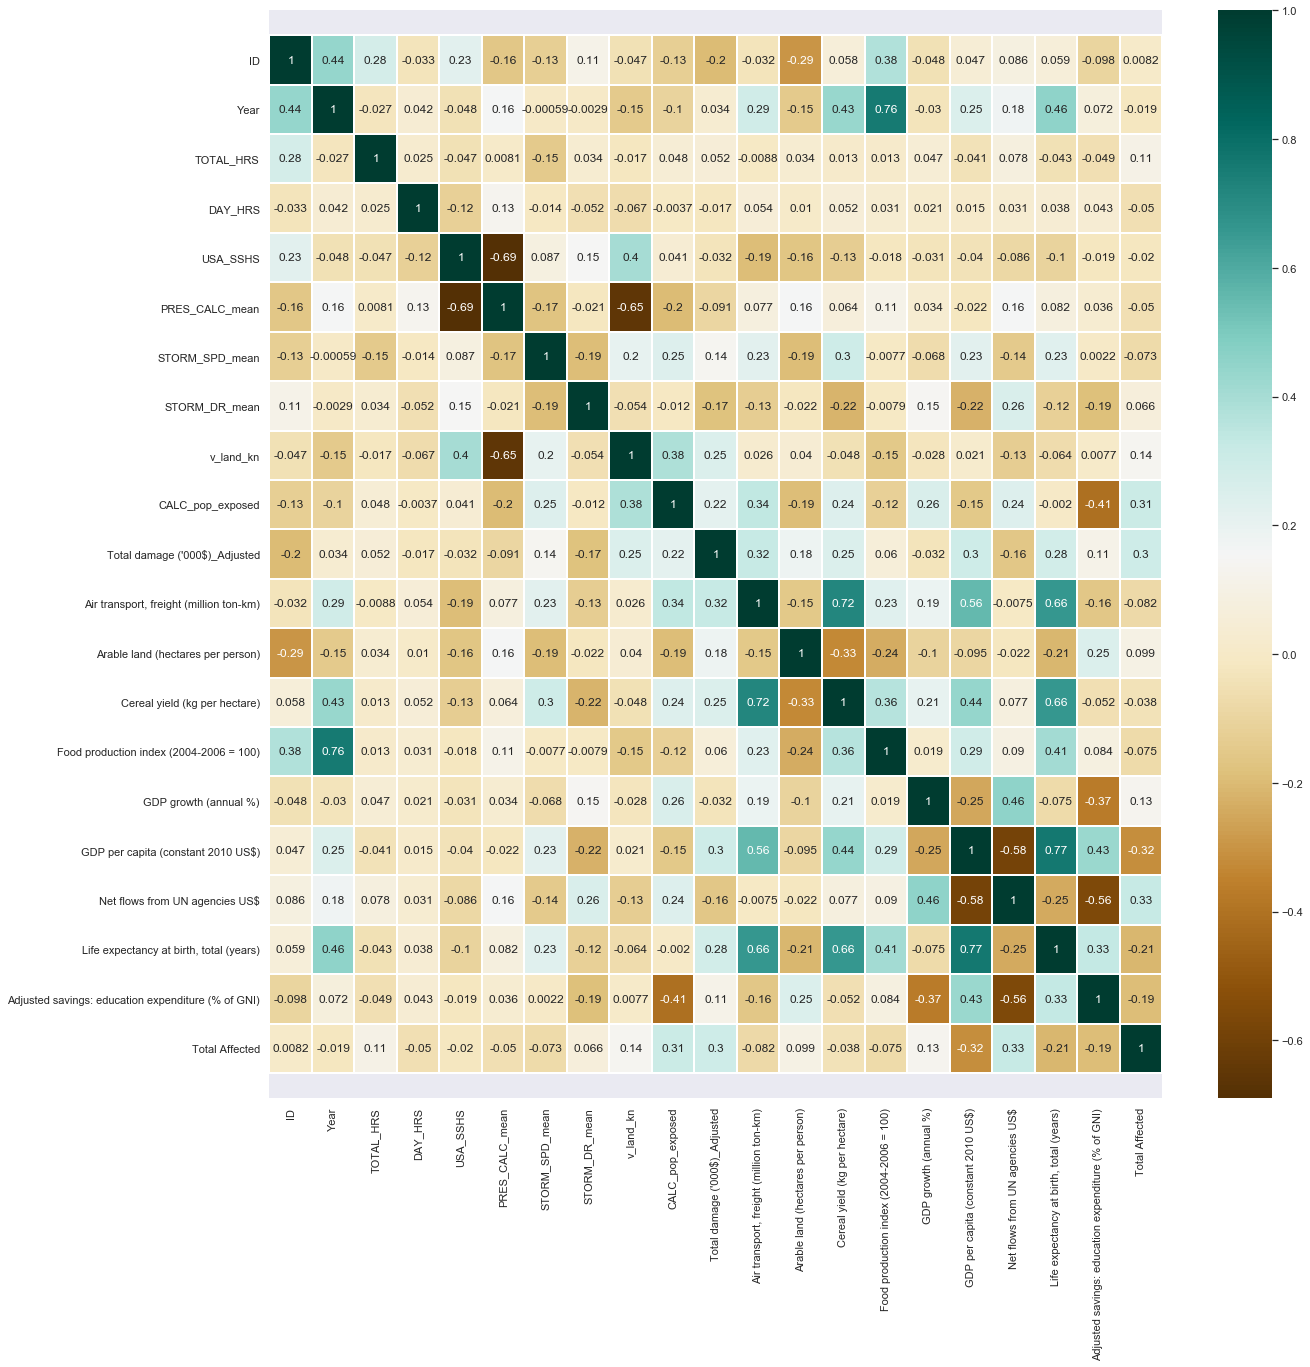

In [23]:
numerical_features = list(df.select_dtypes(include=['float64', 'int64']).columns)
df_num = df[numerical_features]
#correlation matrices
corr_num = df_num.corr(method = "spearman")

fig, ax = plt.subplots(figsize=(20,20))
ax = plt.subplot(111)
sns.set(font_scale=1)
sns.heatmap(corr_num, annot=True,  linewidth=1, cmap="BrBG", ax=ax)
bottom, top = ax.get_ylim()             # this fixes a bug where first and last columns were not visualized correctly
ax.set_ylim(bottom + 0.5, top - 0.5)

### Boxplots and Pairplots

- **Boxplotting numerical columns**

In [24]:
def create_boxplot(column):
    fig, ax = plt.subplots(figsize=(4,4))
    df.boxplot(column = [column])

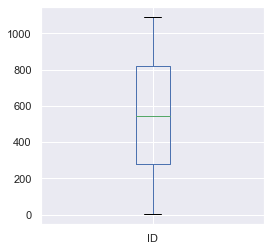

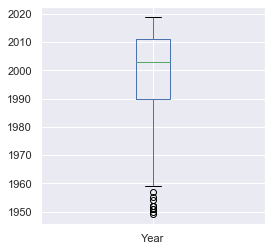

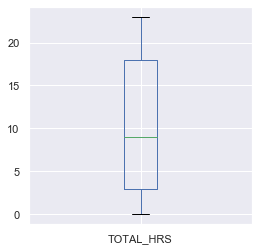

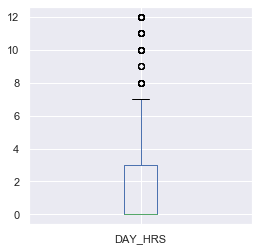

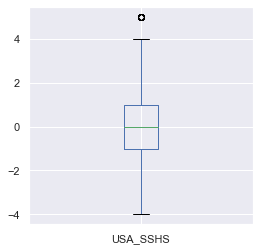

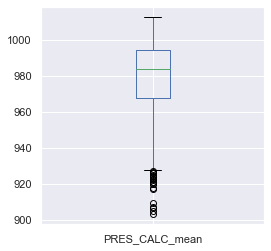

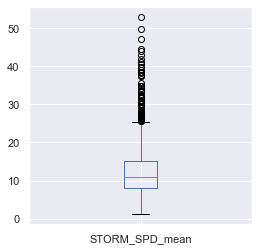

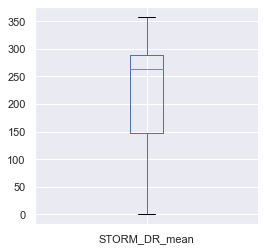

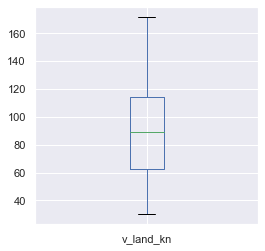

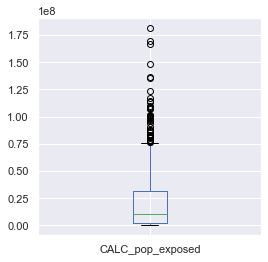

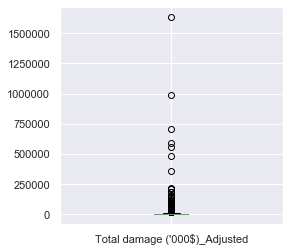

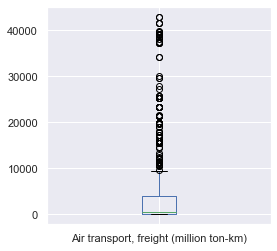

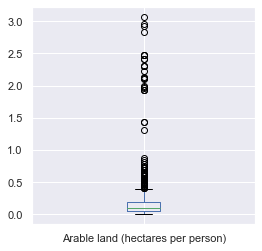

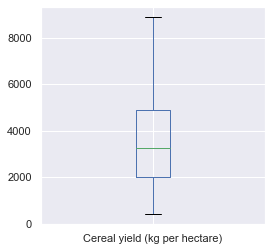

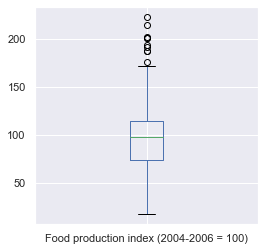

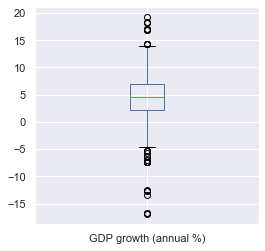

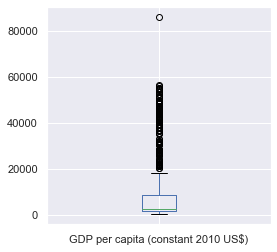

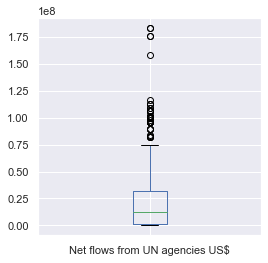

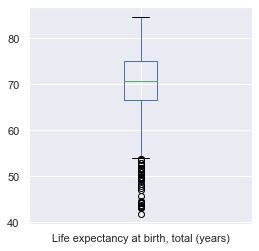

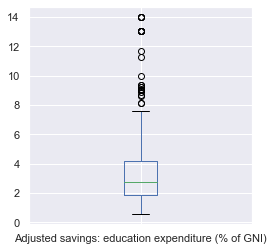

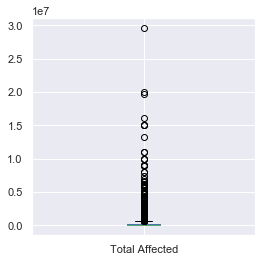

In [25]:
for column in df_num.columns:
    create_boxplot(column)

**WARNING**: Outliers in target 'Total Affected', and features 'CALC_pop_exposed','Total Damage '000$_adjusted','Arable Land', 'GDP Growth', ...

- **Boxplotting non-numerical columns**:

In [26]:
#checking non-numerical features 
obj_feats = df.dtypes[df.dtypes == 'object'].index
obj_feats

Index(['NAME', 'ISO', 'ISO_TIME', 'COORDS', 'BASIN', 'SUBBASIN', 'NATURE',
       'Income_level_Final'],
      dtype='object')

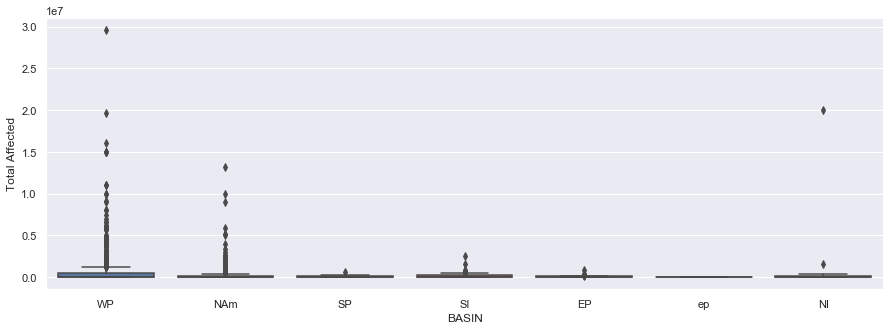

<Figure size 432x288 with 0 Axes>

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
ax=sns.boxplot(data=df,
         x='BASIN',
         y='Total Affected')

plt.show()
plt.clf()

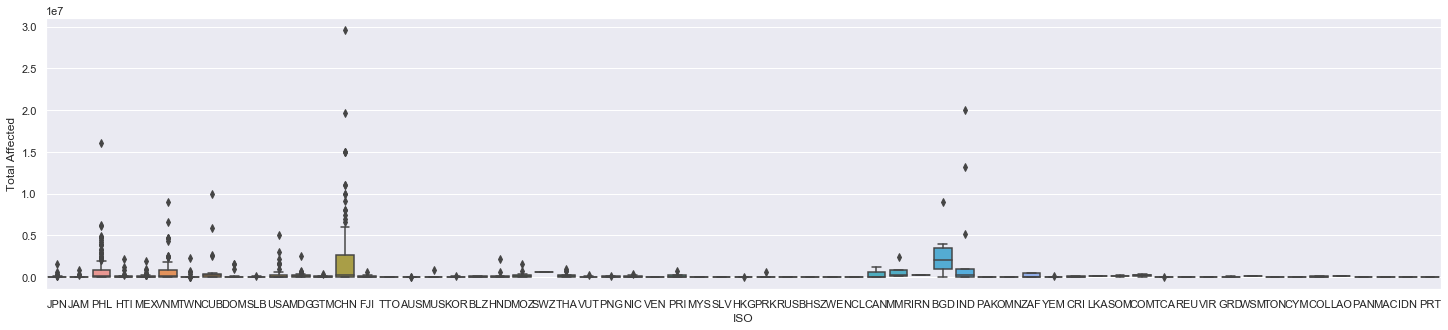

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ax = plt.subplots(figsize=(25,5))
ax=sns.boxplot(data=df,
         x='ISO',
         y='Total Affected')

plt.show()
plt.clf()

- **Pairplot**

In [29]:
# sns.pairplot(df_num)

### Determining skewedness

Credits to [OpenDataScience](https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0) 

We can objectively determine if the variable is skewed using the Shapiro-Wilks test. The null hypothesis for this test is that the data is a sample from a normal distribution, so a p-value less than 0.05 indicates significant skewness.

In [30]:
from scipy.stats import shapiro

In [31]:
shapiro(df['Total Affected'])[1]

0.0

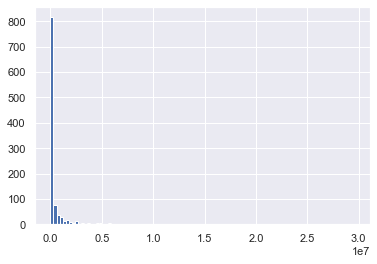

In [32]:
df['Total Affected'].hist(bins=100)

The p-value is not surprisingly less than 0.05, so we can conclude that the variable is skewed. A more convenient way of evaluating skewness is with pandas’ ``.skew`` method. It calculates the Fisher–Pearson standardized moment coefficient for all columns in a dataframe.

Checking skeweness for the other features:

In [33]:
#determine index for continous variables
num_feats = df.dtypes[df.dtypes != 'object'].index

#Calculate skew and sort
skew_feats = df[num_feats].skew().sort_values(ascending = False)
skewness = pd.DataFrame({'Skew': skew_feats})

In [34]:
skewness

,Skew
Total damage ('000$)_Adjusted,12.836028
Total Affected,6.966373
Arable land (hectares per person),5.343659
"Air transport, freight (million ton-km)",2.687817
Adjusted savings: education expenditure (% of GNI),2.390530
Net flows from UN agencies US$,2.070580
CALC_pop_exposed,1.939554
GDP per capita (constant 2010 US$),1.899897
STORM_SPD_mean,1.853383
DAY_HRS,1.536911


Checking distribution when applying log function

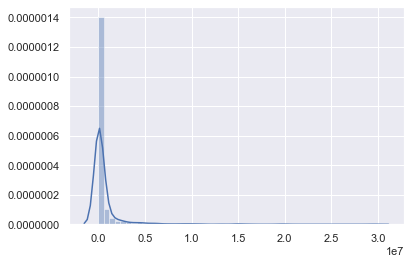

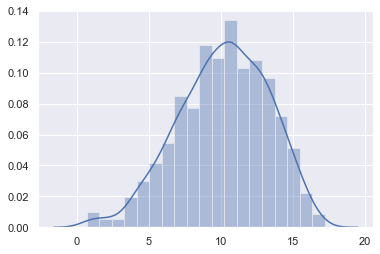

<Figure size 432x288 with 0 Axes>

In [35]:
# reusing code from Juber
ax=sns.distplot(df['Total Affected'].values)

plt.show()
plt.clf()

log_affected=np.log(df['Total Affected'].values)
ax=sns.distplot(log_affected)

plt.show()
plt.clf()

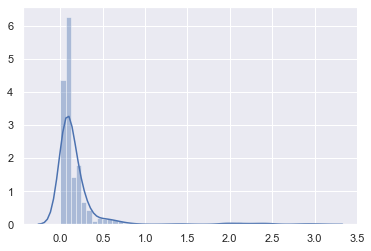

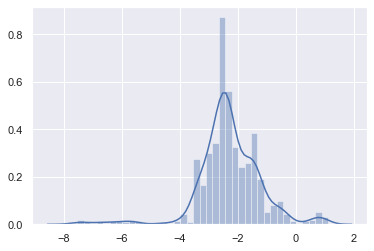

<Figure size 432x288 with 0 Axes>

In [36]:
ax=sns.distplot(df['Arable land (hectares per person)'].values)

plt.show()
plt.clf()

log_affected=np.log(df['Arable land (hectares per person)'].values)
ax=sns.distplot(log_affected)

plt.show()
plt.clf()

### Applying log to skewed variables

In [37]:
# Creating list of features to transform, for skew values above 2

feats_to_log = skewness[skewness['Skew'] > 2].index

In [38]:
feats_to_log

Index(['Total damage ('000$)_Adjusted', 'Total Affected',
       'Arable land (hectares per person)',
       'Air transport, freight (million ton-km)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Net flows from UN agencies US$'],
      dtype='object')

In [39]:
df[feats_to_log].describe()

,Total damage ('000$)_Adjusted,Total Affected,Arable land (hectares per person),"Air transport, freight (million ton-km)",Adjusted savings: education expenditure (% of GNI),Net flows from UN agencies US$
count,7.390000e+02,1.074000e+03,1073.000000,896.000000,1064.000000,1.074000e+03
mean,1.637749e+04,6.144233e+05,0.188690,4305.315968,3.221199,2.157766e+07
std,8.616328e+04,2.045526e+06,0.351739,8471.729906,1.825383,2.645726e+07
min,1.188367e-01,2.000000e+00,0.000425,0.000000,0.538881,-7.000000e+04
25%,2.783550e+02,3.123500e+03,0.059615,95.599998,1.840000,1.030000e+06
50%,1.336189e+03,3.017000e+04,0.092525,426.915730,2.757732,1.278000e+07
75%,6.391244e+03,2.707850e+05,0.191018,3900.080000,4.191404,3.201750e+07
max,1.636382e+06,2.962200e+07,3.069373,42985.295220,14.010000,1.837500e+08


In [40]:
# as log cannot be perfomed to negative numbers, a common technique for handling negative values is to 
# add a constant value to the data prior to applying the log transform. The transformation is 
#therefore log(Y+a) where a is the constant. Some people like to choose a so that min(Y+a) is a very small 
#positive number (like 0.001). Others choose a so that min(Y+a) = 1. For the latter choice, you can show 
# that a = b – min(Y), where b is either a small number or is 1.
# Source : https://blogs.sas.com/content/iml/2011/04/27/log-transformations-how-to-handle-negative-data-values.html

for item in feats_to_log:
    df[item]=np.log((df[item] + 1 - df[item].min()).values)
    

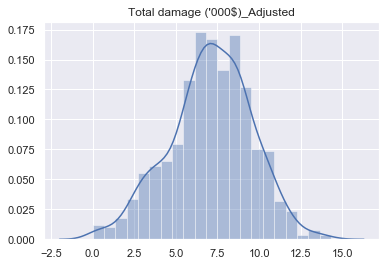

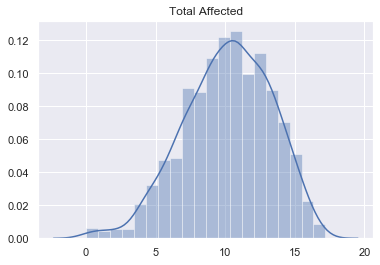

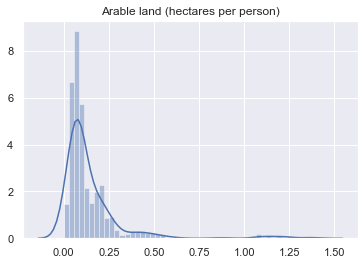

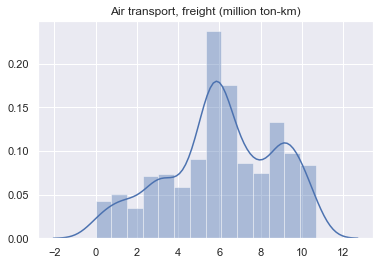

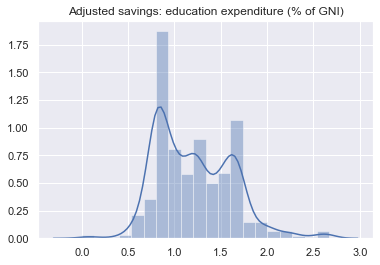

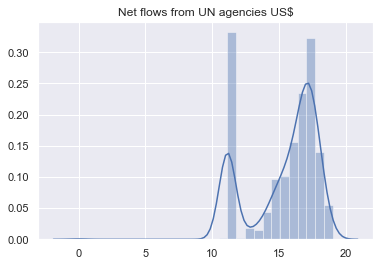

<Figure size 432x288 with 0 Axes>

In [41]:
for item in feats_to_log:
    ax=sns.distplot(df[item].values)
    ax.set_title(item);
    plt.show()
    plt.clf()


### Transforming object variables into numeric with dummy coding

In [42]:
feats_to_dummy =['BASIN', 'SUBBASIN', 'NATURE','Income_level_Final']

In [43]:
for feature in feats_to_dummy:
    dummy = pd.get_dummies(df[feature], prefix=feature)
    df = pd.concat([df,dummy], axis=1)

In [44]:
# Dropping dummed features
df = df.drop(feats_to_dummy, axis=1)

# Checking resulting dataset 

In [45]:
df['Total Affected'].describe()

count    1074.000000
mean       10.167042
std         3.138905
min         0.000000
25%         8.046387
50%        10.314563
75%        12.509076
max        17.204028
Name: Total Affected, dtype: float64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 54 columns):
ID                                                    1074 non-null int64
NAME                                                  1073 non-null object
ISO                                                   1074 non-null object
Year                                                  1074 non-null int64
ISO_TIME                                              1074 non-null object
COORDS                                                1074 non-null object
TOTAL_HRS                                             1074 non-null int64
DAY_HRS                                               1074 non-null int64
USA_SSHS                                              1065 non-null float64
PRES_CALC_mean                                        1069 non-null float64
STORM_SPD_mean                                        1074 non-null float64
STORM_DR_mean                                         1074 non-null f

In [47]:
df.columns

Index(['ID', 'NAME', 'ISO', 'Year', 'ISO_TIME', 'COORDS', 'TOTAL_HRS',
       'DAY_HRS', 'USA_SSHS', 'PRES_CALC_mean', 'STORM_SPD_mean',
       'STORM_DR_mean', 'v_land_kn', 'CALC_pop_exposed',
       'Total damage ('000$)_Adjusted',
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Adjusted savings: education expenditure (% of GNI)', 'Total Affected',
       'BASIN_EP', 'BASIN_NAm', 'BASIN_NI', 'BASIN_SI', 'BASIN_SP', 'BASIN_WP',
       'BASIN_ep', 'SUBBASIN_AS', 'SUBBASIN_BB', 'SUBBASIN_CP', 'SUBBASIN_CS',
       'SUBBASIN_EA', 'SUBBASIN_EP', 'SUBBASIN_GM', 'SUBBASIN_NAm',
       'SUBBASIN_SI', 'SUBBASIN_SP', 'SUBBASIN_WA', 'SUBBASIN_WP', 'NATURE_DS',
       'NATURE_ET', 'NATURE_MX', 'NATURE_NR', 'NA

In [48]:
# Arranging again columns:

df = df[[
    # features from cyclones
       'ID', 'NAME', 'ISO', 'Year', 'ISO_TIME', 'COORDS', 'TOTAL_HRS',
       'DAY_HRS', 'USA_SSHS', 'PRES_CALC_mean', 'STORM_SPD_mean',
       'STORM_DR_mean', 'v_land_kn', 'CALC_pop_exposed',
       "Total damage ('000$)_Adjusted", 'BASIN_EP', 'BASIN_NAm', 'BASIN_NI', 'BASIN_SI', 'BASIN_SP', 'BASIN_WP',
       'BASIN_ep', 'SUBBASIN_AS', 'SUBBASIN_BB', 'SUBBASIN_CP', 'SUBBASIN_CS',
       'SUBBASIN_EA', 'SUBBASIN_EP', 'SUBBASIN_GM', 'SUBBASIN_NAm',
       'SUBBASIN_SI', 'SUBBASIN_SP', 'SUBBASIN_WA', 'SUBBASIN_WP', 'NATURE_DS',
       'NATURE_ET', 'NATURE_MX', 'NATURE_NR', 'NATURE_SS', 'NATURE_TS',
         
    # features from World Bank Indicators:           
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Adjusted savings: education expenditure (% of GNI)', 
       
       'Income_level_Final_High', 'Income_level_Final_High_Middle',
       'Income_level_Final_Low', 'Income_level_Final_Low_Middle',
    
    # Target label at the end 
        'Total Affected']]

In [49]:
df.shape

(1074, 54)

In [50]:
df.to_csv(r'Data_output/Clean_OUTPUT_cyclones.csv', index = False, sep = ';')

#### Checking correlations again

In [51]:
df['TOTAL_HRS'].corr(df['Total Affected'])

0.10377976286933148

(21.5, -0.5)

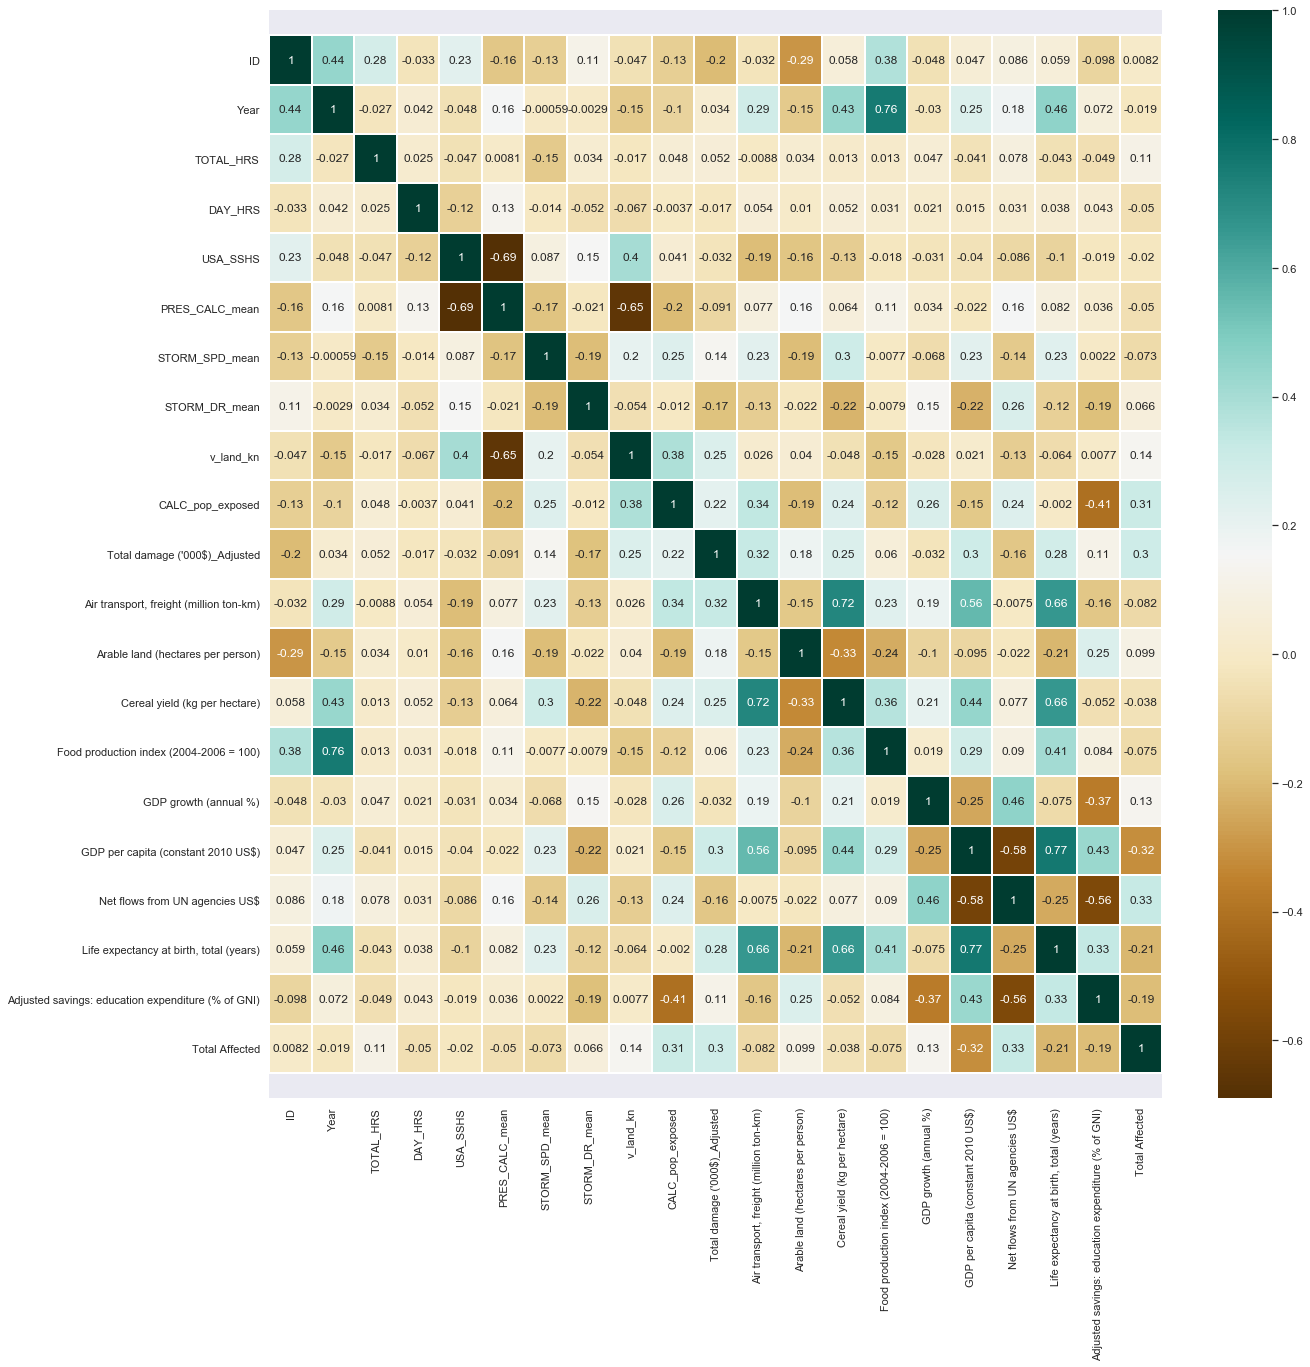

In [52]:
numerical_features = list(df.select_dtypes(include=['float64', 'int64']).columns)
df_num = df[numerical_features]
#correlation matrices
corr_num = df_num.corr(method = "spearman")

fig, ax = plt.subplots(figsize=(20,20))
ax = plt.subplot(111)
sns.set(font_scale=1)
sns.heatmap(corr_num, annot=True,  linewidth=1, cmap="BrBG", ax=ax)
bottom, top = ax.get_ylim()             # this fixes a bug where first and last columns were not visualized correctly
ax.set_ylim(bottom + 0.5, top - 0.5)